 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")

# Read in whale_resturns_csv as a DataFrame, converting dates to DateTimeIndex.
whale_returns = pd.read_csv(whale_returns_csv,index_col='Date', parse_dates=True, infer_datetime_format=True)

# show sample data
whale_returns.head()

# confirm DateTimeIndex
# type(whale_returns.index)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")

# Read in algo_returns_csv as a DataFrame, converting dates to DateTimeIndex.
algo_returns = pd.read_csv(algo_returns_csv,index_col='Date', parse_dates=True, infer_datetime_format=True)

# show sample data
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns.dropna(inplace=True)
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")

# Read in sp500_history_csv as a DataFrame, converting dates to DateTimeIndex.
sp500_history = pd.read_csv(sp500_history_csv,index_col='Date', parse_dates=True, infer_datetime_format=True)

# sort by date, descending
sp500_history.sort_values('Date',ascending=True, inplace=True)
sp500_history.head()
#sp500_history

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [10]:
# Remove '$' from Close and set Close astype float
sp500_history['Close'] = sp500_history['Close'].str.replace('$','').astype(float)
sp500_history.dtypes

Close    float64
dtype: object

In [11]:
# Calculate Daily Returns
sp500_returns = sp500_history.pct_change()
sp500_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [12]:
# Drop nulls
sp500_returns.dropna(inplace=True)
sp500_returns.isnull().sum()

Close    0
dtype: int64

In [13]:
# Rename Column
sp500_returns.rename(columns={'Close': 'S&P500'}, inplace=True)
sp500_returns

,S&P500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Concatenate all DataFrames into a single DataFrame
combined_returns = pd.concat([whale_returns, algo_returns, sp500_returns], axis="columns", join="inner")
combined_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

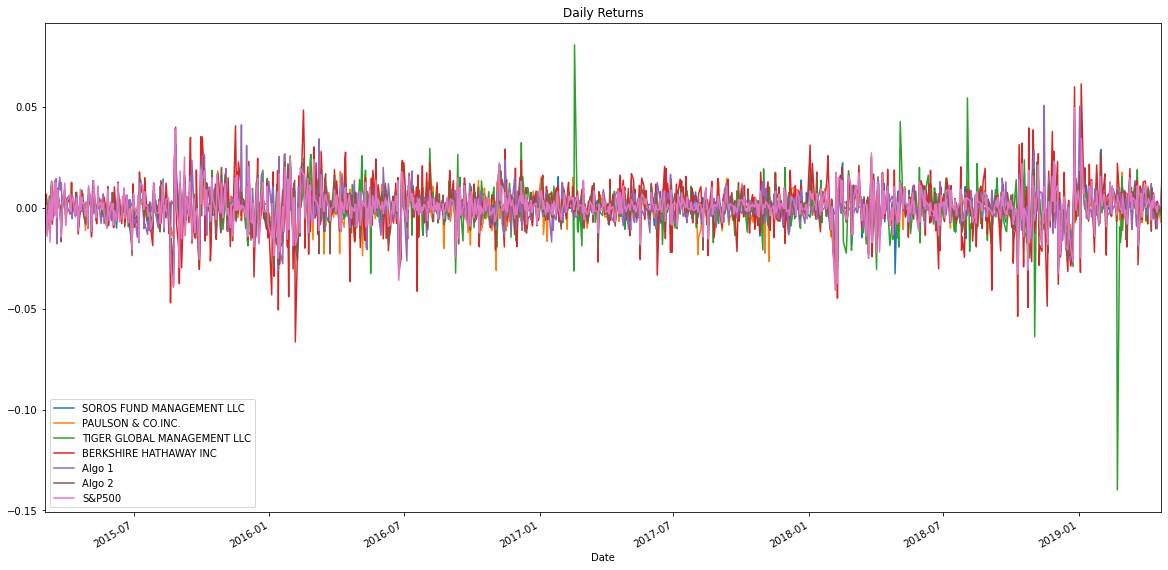

In [15]:
# Plot daily returns
combined_returns.plot(title='Daily Returns',legend=True,figsize=(20,10),xlim=('2015-03-03','2019-04-22'))

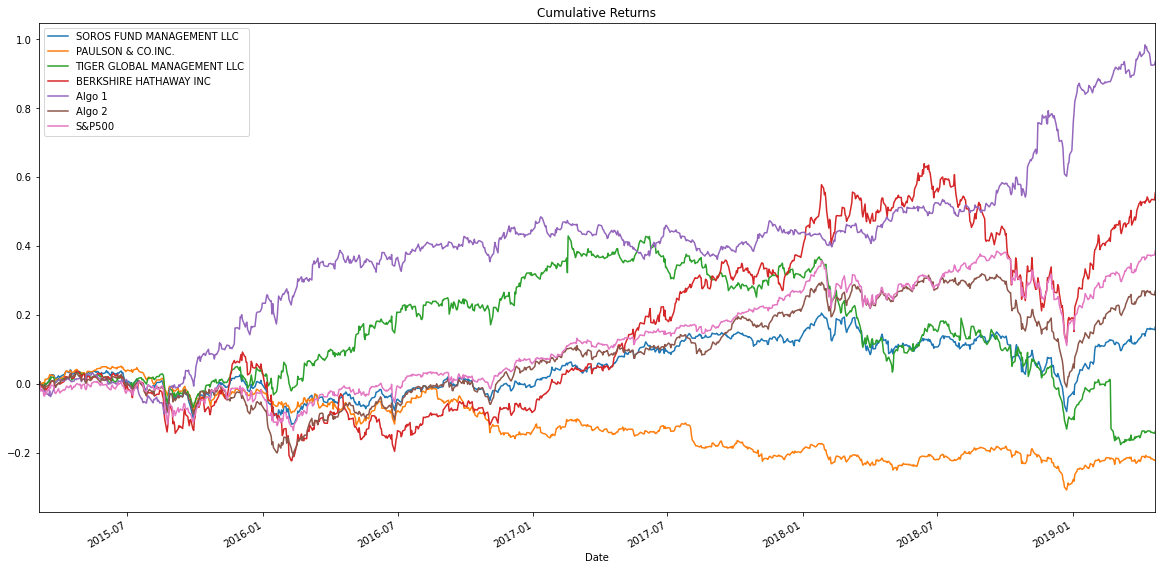

In [16]:
# Plot cumulative returns
cum_returns = (1 + combined_returns).cumprod() -1
cum_returns.plot(title='Cumulative Returns',legend=True,figsize=(20,10),xlim=('2015-03-03','2019-04-22'))


## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

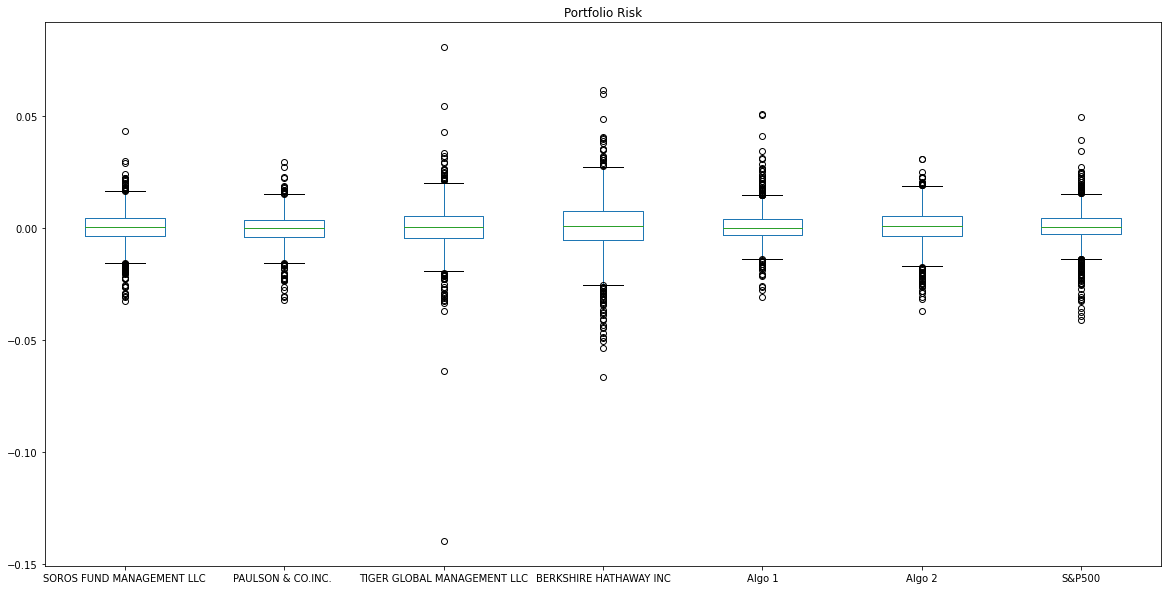

In [17]:
# Box plot to visually show risk
combined_returns.plot.box(title='Portfolio Risk',legend=True,figsize=(20,10))

In [18]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
# combined_returns
daily_combined_std = combined_returns.std()
daily_combined_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P500                         0.008554
dtype: float64

In [19]:
# Determine which portfolios are riskier than the S&P 500
daily_combined_std > daily_combined_std[-1]

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P500                         False
dtype: bool

In [20]:
# Calculate the annualized standard deviation (252 trading days)
annual_combined_std = daily_combined_std * np.sqrt(252)
annual_combined_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P500                         0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

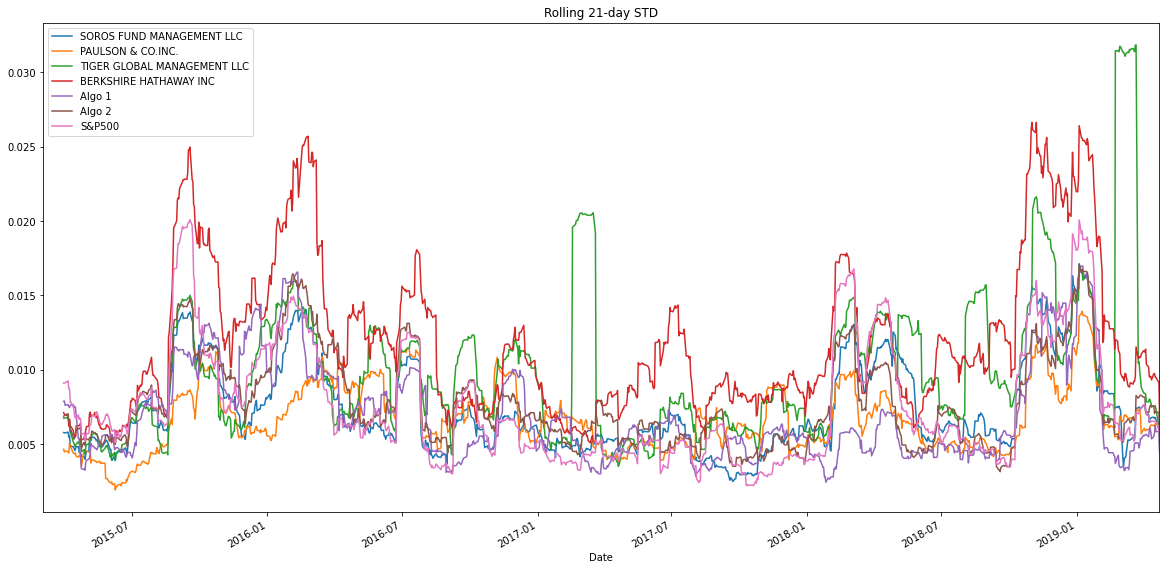

In [21]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
combined_returns.rolling(window=21).std().plot(title='Rolling 21-day STD',legend=True,figsize=(20,10),xlim=('2015-03-03','2019-04-22'))

In [22]:
# Construct a correlation table
import seaborn as sns
correlated_returns = combined_returns.corr()
correlated_returns
# create a heatmap of correlated prices
# sns.heatmap(correlated_returns, vmin=-1, vmax=1)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


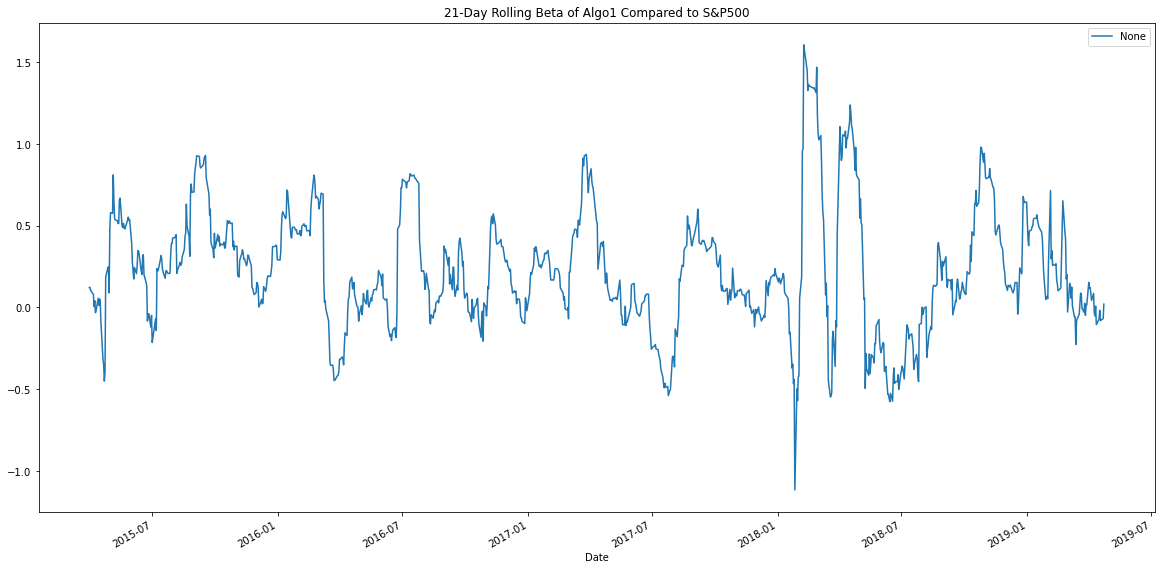

In [23]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)

# Calculating 21 day rolling Beta for Algo1 compared to S&P500:
# first, calculate 21 day rolling algo1 covariance and drop NaN
algo1_rolling21_covariance = combined_returns['Algo 1'].rolling(window=21).cov(combined_returns['S&P500'])
# algo1_rolling21_covariance.plot()

# next, caluclate algo1 variance and drop NaN,
algo1_rolling21_variance = combined_returns['Algo 1'].rolling(window=21).var()
# algo1_rolling21_variance.plot()

# Finally, calculate algo1 21 day rolling beta, based on formula: covariance / variance
algo1_rolling21_beta = algo1_rolling21_covariance / algo1_rolling21_variance
# algo1_rolling21_beta

# Plot algo1 21 day rolling beta compared to SP500
algo1_rolling21_beta.plot(title='21-Day Rolling Beta of Algo1 Compared to S&P500',legend=True,figsize=(20,10))


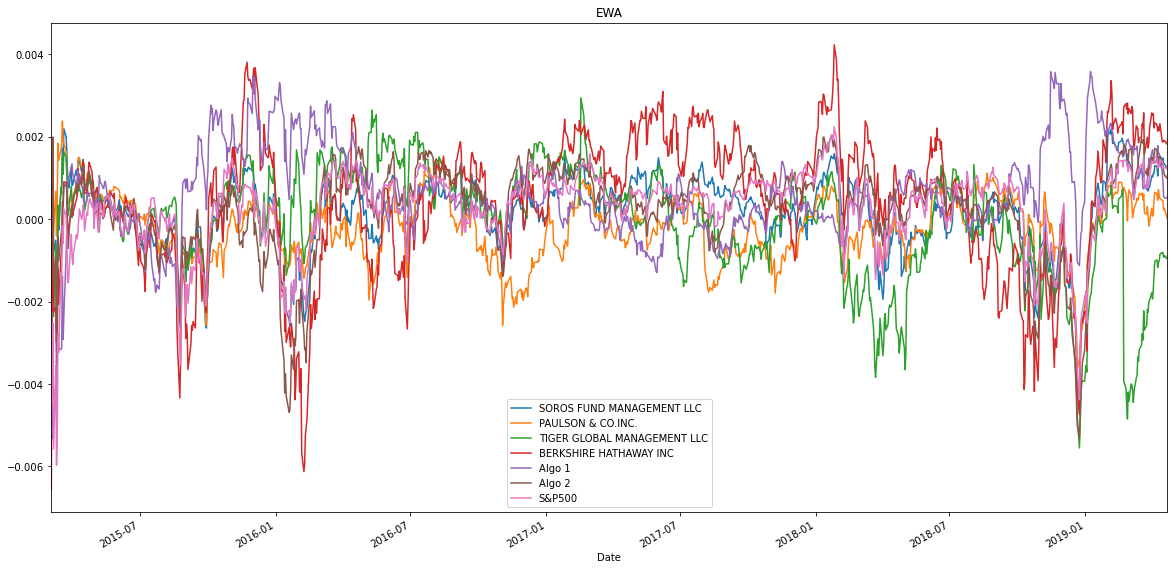

In [24]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE
# ewm(span=windowSize, min_periods=windowSize).mean()
combined_returns.ewm(halflife=21).mean().plot(title='EWA',legend=True,figsize=(20,10),xlim=('2015-03-03','2019-04-22'))
#.mean().plot(title='EWA',legend=True,figsize=(20,10))

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [25]:
# Calculate annualized Sharpe Ratios
combined_sharpe = (combined_returns.mean() * 252) / (combined_returns.std() * np.sqrt(252))
combined_sharpe

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P500                         0.648267
dtype: float64

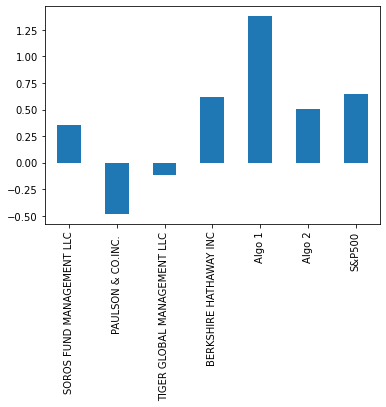

In [26]:
# Visualize the sharpe ratios as a bar plot
combined_sharpe.plot(kind = 'bar')

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here: <b>Algo1 outperforms S&P500 ("the market") and the whales. Algo 2 underperforms S&P500 and Berkshire Hathaway porfolio, but outperforms the other whales.</b>

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [27]:
# Read the first stock
# create path object for cprt
cprt_close_csv = Path("Resources/cprt.csv")

# Read in cprt_resturns_csv as a DataFrame, converting dates to DateTimeIndex.
cprt_close = pd.read_csv(cprt_close_csv, parse_dates=True, infer_datetime_format=True)
# , index_col='Date'
cprt_close.head()

,Date,Symbol,Close
0,1/2/2015,CPRT,18.29
1,1/5/2015,CPRT,18.11
2,1/6/2015,CPRT,17.91
3,1/7/2015,CPRT,17.96
4,1/8/2015,CPRT,18.15


In [28]:
# Read the second stock
# create path object for cprt
nvda_close_csv = Path("Resources/nvda.csv")

# Read in cprt_resturns_csv as a DataFrame, converting dates to DateTimeIndex.
nvda_close = pd.read_csv(nvda_close_csv, parse_dates=True, infer_datetime_format=True)
# , index_col='Date'
nvda_close

,Date,Symbol,Close
0,1/2/2015,NVDA,20.13
1,1/5/2015,NVDA,19.79
2,1/6/2015,NVDA,19.19
3,1/7/2015,NVDA,19.14
4,1/8/2015,NVDA,19.86
...,...,...,...
1252,12/23/2019,NVDA,238.82
1253,12/24/2019,NVDA,238.62
1254,12/26/2019,NVDA,239.19
1255,12/27/2019,NVDA,236.87


In [29]:
# Read the third stock
# create path object for cprt
pwr_close_csv = Path("Resources/pwr.csv")

# Read in cprt_resturns_csv as a DataFrame, converting dates to DateTimeIndex.
pwr_close = pd.read_csv(pwr_close_csv, parse_dates=True, infer_datetime_format=True)
#  index_col='Date'
pwr_close.head()

,Date,Symbol,Close
0,1/2/2015,PWR,28.35
1,1/5/2015,PWR,27.55
2,1/6/2015,PWR,27.21
3,1/7/2015,PWR,27.19
4,1/8/2015,PWR,28.02


In [30]:
# Concatenate all stocks into a single DataFrame
custom_close = pd.concat([cprt_close,nvda_close,pwr_close],axis='rows', join='inner')

custom_close

,Date,Symbol,Close
0,1/2/2015,CPRT,18.29
1,1/5/2015,CPRT,18.11
2,1/6/2015,CPRT,17.91
3,1/7/2015,CPRT,17.96
4,1/8/2015,CPRT,18.15
...,...,...,...
1252,12/23/2019,PWR,41.27
1253,12/24/2019,PWR,41.03
1254,12/26/2019,PWR,41.24
1255,12/27/2019,PWR,40.82


In [31]:
# Reset the index
# set the Date values to datetime
custom_close['Date']= pd.to_datetime(custom_close['Date']) 

# set Date to index
custom_close.set_index('Date', inplace=True)

# sort index (Date) by ascending value
custom_close.sort_index(ascending=True)
custom_close

,Symbol,Close
Date,,
2015-01-02,CPRT,18.29
2015-01-05,CPRT,18.11
2015-01-06,CPRT,17.91
2015-01-07,CPRT,17.96
2015-01-08,CPRT,18.15
...,...,...
2019-12-23,PWR,41.27
2019-12-24,PWR,41.03
2019-12-26,PWR,41.24


In [32]:
# Pivot so that each column of prices represents a unique symbol
# Pivot symbol column values to new columns with Close as new columns values
custom_close = custom_close.pivot(columns='Symbol',values='Close')

# re-sort by date
custom_close.sort_values(by='Date', ascending=True, inplace=True)
custom_close

Symbol,CPRT,NVDA,PWR
Date,,,
2015-01-02,18.29,20.13,28.35
2015-01-05,18.11,19.79,27.55
2015-01-06,17.91,19.19,27.21
2015-01-07,17.96,19.14,27.19
2015-01-08,18.15,19.86,28.02
...,...,...,...
2019-12-23,89.87,238.82,41.27
2019-12-24,90.91,238.62,41.03
2019-12-26,91.02,239.19,41.24


In [33]:
# calculate returns and store in dataframe
custom_returns = custom_close.pct_change()

# Drop Nulls
custom_returns.dropna(inplace=True)
custom_returns

Symbol,CPRT,NVDA,PWR
Date,,,
2015-01-05,-0.009841,-0.016890,-0.028219
2015-01-06,-0.011044,-0.030318,-0.012341
2015-01-07,0.002792,-0.002606,-0.000735
2015-01-08,0.010579,0.037618,0.030526
2015-01-09,-0.004959,0.004028,-0.017488
...,...,...,...
2019-12-23,-0.009369,-0.002298,0.000000
2019-12-24,0.011572,-0.000837,-0.005815
2019-12-26,0.001210,0.002389,0.005118


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [34]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]

#using dot function to calculated custom portfolio returns based on weights
custom_weighted_returns = custom_returns.dot(weights)
custom_weighted_returns

Date
2015-01-05   -0.018317
2015-01-06   -0.017901
2015-01-07   -0.000183
2015-01-08    0.026241
2015-01-09   -0.006139
                ...   
2019-12-23   -0.003889
2019-12-24    0.001640
2019-12-26    0.002906
2019-12-27   -0.007360
2019-12-30   -0.005766
Length: 1256, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [35]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# combine combined_returns with new custom_weighted_returns and rename new column to "Custom"
combined_returns = pd.concat([combined_returns, custom_weighted_returns.rename('Custom')], axis="columns", join="inner")

# reorder columns so S&_500 is the last column (for easy ref/comparison by loc later)
cols = combined_returns.columns.tolist()
cols = cols[:6] + cols[-1:] + cols[-2:-1]
combined_returns = combined_returns[cols]

combined_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Custom,S&P500
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.007829,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.002511,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.007556,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009354,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.001593,0.003944
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.005436,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.004071,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001090,0.001579


In [36]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_returns.dropna(inplace=True)
combined_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Custom,S&P500
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.007829,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.002511,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.007556,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009354,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.001593,0.003944
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.005436,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.004071,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001090,0.001579


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [37]:
# Risk
daily_combined_std = combined_returns.std()
daily_combined_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
Custom                         0.014845
S&P500                         0.008554
dtype: float64

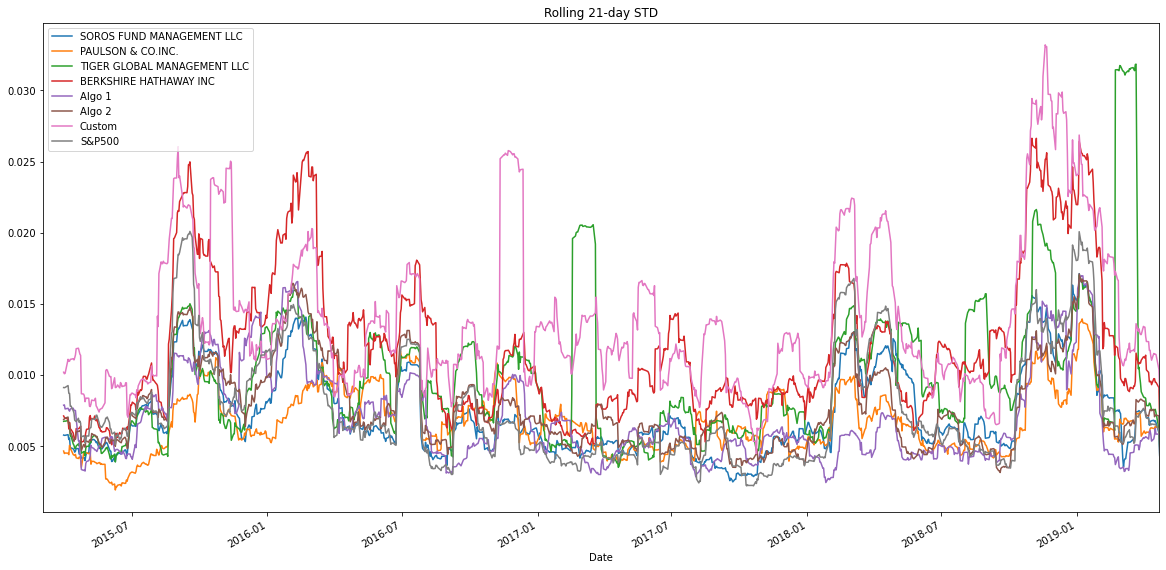

In [38]:
# Rolling
# Calculate and plot the rolling standard deviation using a 21 trading day window
combined_returns.rolling(window=21).std().plot(title='Rolling 21-day STD',legend=True,figsize=(20,10),xlim=('2015-03-03','2019-04-22'))

In [39]:
# Annualized Sharpe Ratios
combined_sharpe = (combined_returns.mean() * 252) / (combined_returns.std() * np.sqrt(252))
combined_sharpe

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
Custom                         1.510209
S&P500                         0.648267
dtype: float64

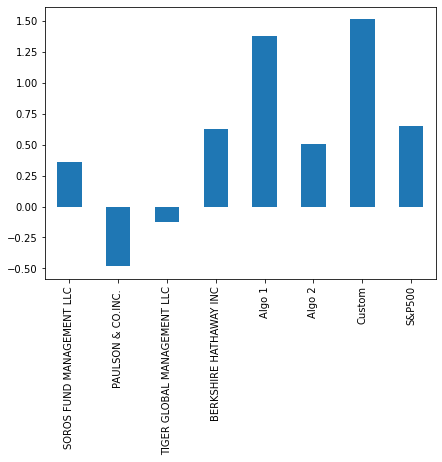

In [50]:
# Visualize the sharpe ratios as a bar plot
combined_sharpe.plot(kind = 'bar',figsize=(7,5))

In [53]:
# Create a correlation analysis
correlated_returns = combined_returns.corr()
correlated_returns
# create a heatmap of correlated prices
# sns.heatmap(correlated_returns, vmin=-1, vmax=1)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Custom,S&P500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.646656,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.476047,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.395228,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.617218,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.205648,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.690944,0.858764
Custom,0.646656,0.476047,0.395228,0.617218,0.205648,0.690944,1.000000,0.703656
S&P500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,0.703656,1.000000


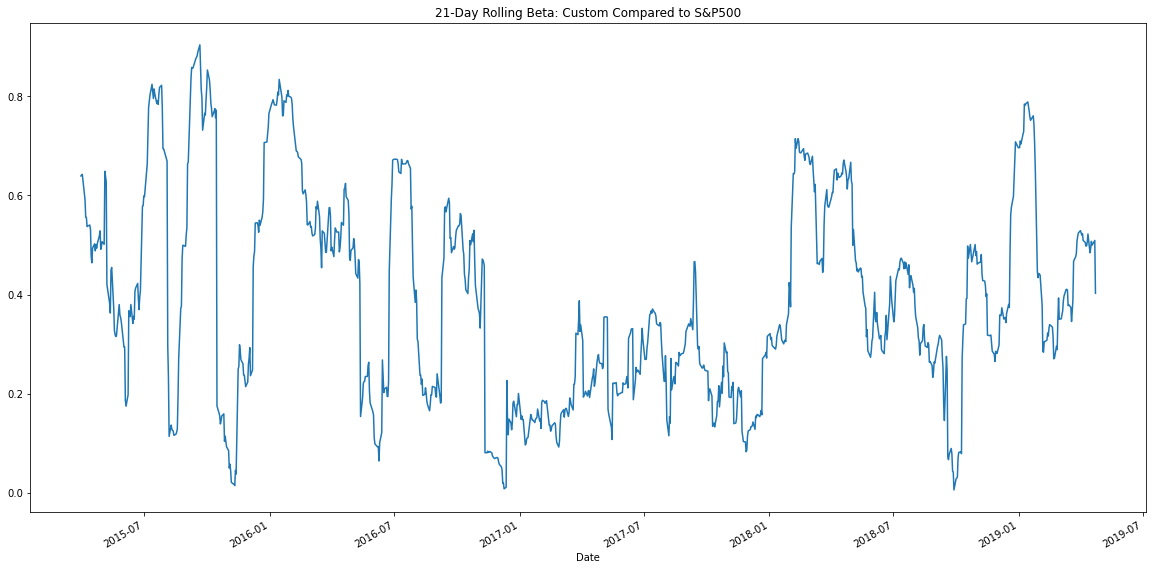

In [60]:
# Beta

# Calculating 21 day rolling Beta for Algo1 compared to S&P500:
# first, calculate 21 day rolling algo1 covariance and drop NaN
custom_rolling21_covariance = combined_returns['Custom'].rolling(window=21).cov(combined_returns['S&P500'])
# algo1_rolling21_covariance.plot()

# next, caluclate algo1 variance and drop NaN,
custom_rolling21_variance = combined_returns['Custom'].rolling(window=21).var()
# algo1_rolling21_variance.plot()

# Finally, calculate algo1 21 day rolling beta, based on formula: covariance / variance
custom_rolling21_beta = custom_rolling21_covariance / custom_rolling21_variance
# algo1_rolling21_beta

# Plot algo1 21 day rolling beta compared to SP500
custom_rolling21_beta.plot(title='21-Day Rolling Beta: Custom Compared to S&P500',figsize=(20,10))
